## Overview
In this exercise, you will create visualizations or a small dashboard to analyze movie ratings from the MovieLens 200k dataset. Your goal is to answer analytical questions with clear, well-designed charts.

## Dataset
**File**: `data/movie_ratings.csv`

### Columns
- **user_id**: Unique user identifier
- **movie_id**: Unique movie identifier
- **rating**: Rating (1–5 scale)
- **timestamp**: When the rating was given
- **age**: User age
- **gender**: User gender (M/F)
- **occupation**: User occupation
- **zip_code**: User ZIP code
- **title**: Movie title with year
- **year**: Movie release year
- **decade**: Movie release decade
- **genres**: Pipe-separated genres for each movie
- **rating_year**: Year the rating was given

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

pd.options.display.max_columns = None
%matplotlib inline

file_path = "../data/movie_ratings.csv"

df = pd.read_csv(file_path)
df.shape
df.head(3)
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB


user_id         0
movie_id        0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip_code        0
title           0
year           36
decade         36
genres          0
rating_year     0
dtype: int64

## Questions to Answer
1. What's the breakdown of genres for the movies that were rated?
2. Which genres have the highest viewer satisfaction (highest ratings)? 

In [2]:

df_genres = df.assign(genre=df['genres'].str.split('|')).explode('genre')

genre_ratings = df_genres.groupby('genre')['rating'].mean().sort_values(ascending=False)

genre_ratings.head(10)


genre
Film-Noir      3.921523
War            3.815812
Drama          3.687379
Documentary    3.672823
Mystery        3.638132
Crime          3.632278
Romance        3.621705
Western        3.613269
Animation      3.576699
Sci-Fi         3.560723
Name: rating, dtype: float64

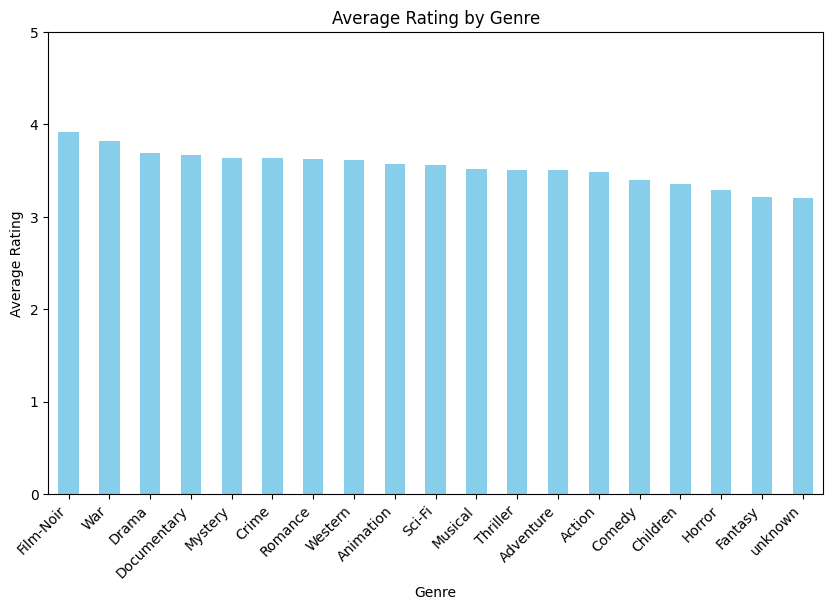

In [3]:

plt.figure(figsize=(10,6))
genre_ratings.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.ylim(0, 5)  # ratings are on a 1–5 scale
plt.xticks(rotation=45, ha='right')
plt.show()

3. How does mean rating change across movie release years?

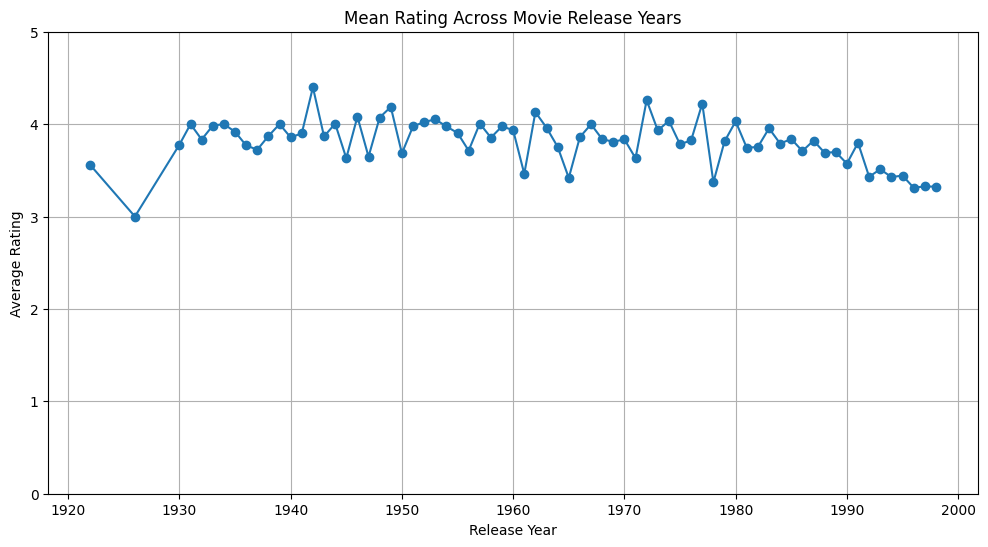

In [4]:
ratings_by_year = df.groupby('year')['rating'].mean()

plt.figure(figsize=(12,6))
ratings_by_year.plot(kind='line', marker='o')
plt.title("Mean Rating Across Movie Release Years")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(True)
plt.show()


4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?

In [13]:
movie_stats = df.groupby('title').agg(
    mean_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
)

best_50 = movie_stats[movie_stats['num_ratings'] >= 50] \
            .sort_values('mean_rating', ascending=False) \
            .head(5)

best_150 = movie_stats[movie_stats['num_ratings'] >= 150] \
             .sort_values('mean_rating', ascending=False) \
             .head(5)

print("Top 5 Movies (≥50 ratings):")
display(best_50)

print("\nTop 5 Movies (≥150 ratings):")
display(best_150)


Top 5 Movies (≥50 ratings):


,mean_rating,num_ratings
title,,
"Close Shave, A (1995)",4.491071,336
Schindler's List (1993),4.466443,596
"Wrong Trousers, The (1993)",4.466102,236
Casablanca (1942),4.456790,729
Wallace & Gromit: The Best of Aardman Animation (1996),4.447761,67



Top 5 Movies (≥150 ratings):


,mean_rating,num_ratings
title,,
"Close Shave, A (1995)",4.491071,336
Schindler's List (1993),4.466443,596
"Wrong Trousers, The (1993)",4.466102,236
Casablanca (1942),4.456790,729
"Shawshank Redemption, The (1994)",4.445230,283


## Notes and Caveats
- Movies can belong to multiple genres. Exploding genres is acceptable for preference profiling but not for market share.
- Use minimum sample thresholds (e.g., n ≥ 50 or 100) to avoid small-sample noise.
- Decade and age-group distributions are uneven; include counts or context where relevant.

## Deliverables

### Option A: Streamlit Dashboard (Recommended)
Create an interactive Streamlit app that:
- Loads and displays the dataset
- Contains visualizations answering each question
- Includes interactive filters (age ranges, occupations, genres, etc.)
- Has clear titles, labels, and explanations for each chart
- Provides insights and conclusions based on the visualizations